## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from math import exp

In [2]:
data = pd.read_csv('data/revenue-data.csv')

In [3]:
data.head()

,Age,SiteSpending,SiteTime,RecommendImpression,Education,WorkType,Sex,Region,Salary
0,32,314.06,30.14,0,Degree,Private sector,Male,London,60173.49
1,20,3758.36,149.36,4,GCSE,Private sector,Female,South East,42965.45
2,36,601.72,21.87,0,Masters,Private sector,Male,East of England,54924.41
3,21,44.89,182.80,9,Masters,Private sector,Female,Northern Ireland,26734.99
4,24,614.80,194.34,0,GCSE,Private sector,Male,Scotland,15325.23


In [4]:
data['£35K+ Salary'] = np.where(data['Salary'] > 35000, True, False )

In [5]:
data.tail()

,Age,SiteSpending,SiteTime,RecommendImpression,Education,WorkType,Sex,Region,Salary,£35K+ Salary
995,56,177.67,272.87,5,GCSE,Public Sector,Female,North West,22306.84,False
996,54,155.42,231.17,5,Other,Private sector,Male,Wales,27704.97,False
997,22,2376.10,287.15,11,Other,Private sector,Male,South East,62542.89,True
998,49,4355.04,27.78,0,Degree,Private sector,Male,Northern Ireland,96745.84,True
999,51,40.43,188.38,9,PhD,Private sector,Male,North West,48651.47,True


In [6]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

data["Education"] = le.fit_transform(data['Education'])
data["WorkType"] = le.fit_transform(data["WorkType"])
data['Sex'] = le.fit_transform(data['Sex'])
data['Region'] =  le.fit_transform(data['Region'])

In [7]:
data

,Age,SiteSpending,SiteTime,RecommendImpression,Education,WorkType,Sex,Region,Salary,£35K+ Salary
0,32,314.06,30.14,0,1,0,1,2,60173.49,True
1,20,3758.36,149.36,4,2,0,0,7,42965.45,True
2,36,601.72,21.87,0,3,0,1,1,54924.41,True
3,21,44.89,182.80,9,3,0,0,5,26734.99,False
4,24,614.80,194.34,0,2,0,1,6,15325.23,False
...,...,...,...,...,...,...,...,...,...,...
995,56,177.67,272.87,5,2,1,0,4,22306.84,False
996,54,155.42,231.17,5,5,0,1,9,27704.97,False
997,22,2376.10,287.15,11,5,0,1,7,62542.89,True
998,49,4355.04,27.78,0,1,0,1,5,96745.84,True


In [8]:
#feature variables
x = data.drop(['£35K+ Salary'], axis=1)
x = x.drop(['Salary'], axis=1)
x

,Age,SiteSpending,SiteTime,RecommendImpression,Education,WorkType,Sex,Region
0,32,314.06,30.14,0,1,0,1,2
1,20,3758.36,149.36,4,2,0,0,7
2,36,601.72,21.87,0,3,0,1,1
3,21,44.89,182.80,9,3,0,0,5
4,24,614.80,194.34,0,2,0,1,6
...,...,...,...,...,...,...,...,...
995,56,177.67,272.87,5,2,1,0,4
996,54,155.42,231.17,5,5,0,1,9
997,22,2376.10,287.15,11,5,0,1,7
998,49,4355.04,27.78,0,1,0,1,5


In [9]:
#target variable
y = data['£35K+ Salary']
y

0       True
1       True
2       True
3      False
4      False
       ...  
995    False
996    False
997     True
998     True
999     True
Name: £35K+ Salary, Length: 1000, dtype: bool

In [10]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

## Decision Tree Classifier

In [11]:
# Create Decision Tree classifer object
model = DecisionTreeClassifier()

# Train Decision Tree Classifer
model = model.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = model.predict(x_test)

In [12]:
#Evaluation using Accuracy score
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100)

Accuracy: 93.0


In [13]:
#Evaluation using Confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[ 58,   6],
       [  8, 128]], dtype=int64)

In [14]:
#Evaluation using Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       False       0.88      0.91      0.89        64
        True       0.96      0.94      0.95       136

    accuracy                           0.93       200
   macro avg       0.92      0.92      0.92       200
weighted avg       0.93      0.93      0.93       200



In [15]:
#checking prediction value
model.predict([[50,40,190,9,6,1,2,4]])

C:\Users\syedi\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([ True])

In [16]:
#checking prediction value
model.predict([[20,630,174.34,0,2,0,1,5]])

C:\Users\syedi\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([False])

## Logistic Regression

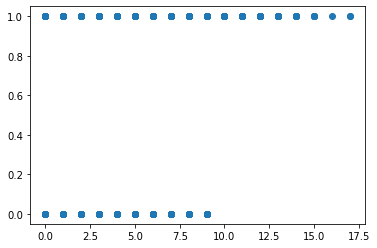

In [69]:
plt.scatter(data['RecommendImpression'], data['£35K+ Salary'])
plt.show()# Divide the Data into training set and test set
X_train, X_test, y_train, y_test = train_test_split(data['RecommendImpression'], data['£35K+ Salary'], test_size=0.20)

In [70]:
# Building the Logistic Regression model

# Normalising the data
def normalize(X):
    return X - X.mean()

# Make predictions
def predict(X, b0, b1):
    return np.array([1 / (1 + exp(-1*b0 + -1*b1*x)) for x in X])

# The model
def logistic_regression(X, Y):

    X = normalize(X)

    # Initializing variables
    b0 = 0
    b1 = 0
    L = 0.001
    epochs = 300

    for epoch in range(epochs):
        y_pred = predict(X, b0, b1)
        D_b0 = -2 * sum((Y - y_pred) * y_pred * (1 - y_pred)) # Loss wrt b0
        D_b1 = -2 * sum(X * (Y - y_pred) * y_pred * (1 - y_pred)) # Loss wrt b1
        # Update b0 and b1
        b0 = b0 - L * D_b0
        b1 = b1 - L * D_b1

        return b0, b1

In [71]:
from mpmath import *

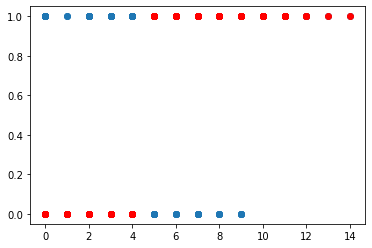

Accuracy = 0.625


In [72]:
# Training the Model
b0, b1 = logistic_regression(X_train, y_train)# Making predictions and setting a threshold
X_test_norm = normalize(X_test)
y_pred = predict(X_test_norm, b0, b1)
y_pred = [1 if p >= 0.5 else 0 for p in y_pred]
# Plotting the data
plt.scatter(X_test, y_test)
plt.scatter(X_test, y_pred, c="red")
plt.show()# Calculating the accuracy
accuracy = 0
for i in range(len(y_pred)):
    if y_pred[i] == y_test.iloc[i]:
        accuracy += 1
print(f"Accuracy = {accuracy / len(y_pred)}")